In [1]:
from __future__ import print_function
from __future__ import absolute_import
from __future__ import print_function
import keras
import tensorflow as tf
import json
import numpy as np
from tensorflow.keras.layers import Dense, Conv2D, BatchNormalization, Activation
from tensorflow.keras.layers import AveragePooling2D, Input, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import l2
from tensorflow.keras import backend as K
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import cifar10
import numpy as np
import os
from keras.layers import GlobalAveragePooling2D, GlobalMaxPooling2D, Reshape, Dense, multiply, Permute, Concatenate, Conv2D, Add, Activation, Lambda
from keras import backend as K
from keras.activations import sigmoid

In [2]:
test_dir="/data/azhuang/Skin/HAM10000/Image_transfer/testImage"

height = 450  #height of the image
width = 600  #width of the image
channels = 3  #colour picture
batch_size = 200 * 2  #400 images at a time
num_classes = 7  #seven categories
SEED = 666
epochs = 300

test_datagen = keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)
test_generator = test_datagen.flow_from_directory(test_dir,
                                                    target_size = (height, width),
                                                    batch_size = batch_size,
                                                    seed = SEED,
                                                    shuffle = False,
                                                    class_mode = "categorical")
test_num = test_generator.samples
print("The total number of samples is：")
print(test_num)

Found 2003 images belonging to 7 classes.
The total number of samples is：
2003


In [3]:
import tensorflow as tf
from keras.models import load_model
model=load_model('callbacks_EarlyStopping_2/callbacks_EarlyStopping.h5')

/data/azhuang/software/Anaconda2/lib/python3.7/site-packages/keras/layers/core/lambda_layer.py:305: UserWarning: keras_applications.inception_resnet_v2 is not loaded, but a Lambda layer uses it. It may cause errors.
  'function_type')


In [4]:
test_predict = model.predict_generator(test_generator,
                       workers = 50,
                       use_multiprocessing = True)

/data/azhuang/software/Anaconda2/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


In [5]:
test_predict_class_indices = np.argmax(test_predict[-1], axis = 1)#Find the predicted class which has the highest value

In [6]:
y_test=test_generator.classes

In [7]:
from sklearn.metrics import classification_report

# target_names=['nv','mel','bkl','bcc','akiec','vasc','df']
target_names=['akiec','bcc','bkl','df','nv','mel','vasc']
print(classification_report(y_test, test_predict_class_indices, target_names=target_names,digits=4))

              precision    recall  f1-score   support

       akiec     0.7361    0.8154    0.7737        65
         bcc     0.9327    0.9417    0.9372       103
         bkl     0.9158    0.8409    0.8768       220
          df     0.9500    0.8261    0.8837        23
          nv     0.9328    0.9828    0.9572      1341
         mel     0.8951    0.6502    0.7532       223
        vasc     0.8667    0.9286    0.8966        28

    accuracy                         0.9201      2003
   macro avg     0.8899    0.8551    0.8683      2003
weighted avg     0.9196    0.9201    0.9170      2003



In [8]:
test_generator.class_indices

{'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6}

In [9]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, test_predict_class_indices)

array([[  53,    3,    0,    0,    8,    1,    0],
       [   2,   97,    1,    1,    1,    0,    1],
       [  13,    0,  185,    0,   15,    7,    0],
       [   0,    1,    0,   19,    3,    0,    0],
       [   3,    3,    7,    0, 1318,    9,    1],
       [   1,    0,    9,    0,   66,  145,    2],
       [   0,    0,    0,    0,    2,    0,   26]])

In [10]:
# Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, test_predict_class_indices)

0.9201198202695956

In [11]:
#recall、Sensitivity
from sklearn.metrics import recall_score
recall_score(y_test, test_predict_class_indices,average='micro')

0.9201198202695956

In [12]:
import numpy as np

# 1-confusion_matrix
confusion_matrix = confusion_matrix(y_test, test_predict_class_indices)
# 2-TP/TN/FP/FN
FP = confusion_matrix .sum(axis=0) - np.diag(confusion_matrix )  
FN = confusion_matrix .sum(axis=1) - np.diag(confusion_matrix )
TP = np.diag(confusion_matrix )
TN = confusion_matrix .sum() - (FP + FN + TP)
FP = FP.astype(float) 
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
print(TP)
print(TN)
print(FP)
print(FN)

# 3-Calculation of other performance parameters
TPR = TP/(TP+FN) # Sensitivity/ hit rate/ recall/ true positive rate
TNR = TN/(TN+FP) # Specificity/ true negative rate
PPV = TP/(TP+FP) # Precision/ positive predictive value
NPV = TN/(TN+FN) # Negative predictive value
FPR = FP/(FP+TN) # Fall out/ false positive rate
FNR = FN/(TP+FN) # False negative rate
FDR = FP/(TP+FP) # False discovery rate
ACC = TP/(TP+FN) # accuracy of each class
print(TPR)
print(TNR)
print(PPV)
print(NPV)
print(FPR)
print(FNR)
print(FDR)
print(ACC)

[  53.   97.  185.   19. 1318.  145.   26.]
[1919. 1893. 1766. 1979.  567. 1763. 1971.]
[19.  7. 17.  1. 95. 17.  4.]
[12.  6. 35.  4. 23. 78.  2.]
[0.81538462 0.94174757 0.84090909 0.82608696 0.98284862 0.65022422
 0.92857143]
[0.99019608 0.99631579 0.99046551 0.99949495 0.85649547 0.99044944
 0.99797468]
[0.73611111 0.93269231 0.91584158 0.95       0.93276716 0.89506173
 0.86666667]
[0.9937856  0.99684044 0.98056635 0.99798285 0.96101695 0.95763172
 0.99898632]
[0.00980392 0.00368421 0.00953449 0.00050505 0.14350453 0.00955056
 0.00202532]
[0.18461538 0.05825243 0.15909091 0.17391304 0.01715138 0.34977578
 0.07142857]
[0.26388889 0.06730769 0.08415842 0.05       0.06723284 0.10493827
 0.13333333]
[0.81538462 0.94174757 0.84090909 0.82608696 0.98284862 0.65022422
 0.92857143]


In [13]:
precision=[0.73611111,0.93269231,0.91584158,0.95,0.93276716,0.89506173,0.86666667]
recall=[0.81538462,0.94174757,0.84090909,0.82608696,0.98284862,0.65022422,0.92857143]
for p,r in zip(precision,recall):
    print((2*p*r)/(p+r))

0.7737226292013425
0.9371980674036733
0.8767772487850678
0.8837209322228231
0.9571532303699433
0.7532467570045539
0.8965517265873959


In [14]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
a=enc.fit_transform(np.array(y_test).reshape(len(y_test), -1))
a=a.toarray()

In [16]:
b=test_predict[-1]

/data/azhuang/software/Anaconda2/lib/python3.7/site-packages/ipykernel_launcher.py:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


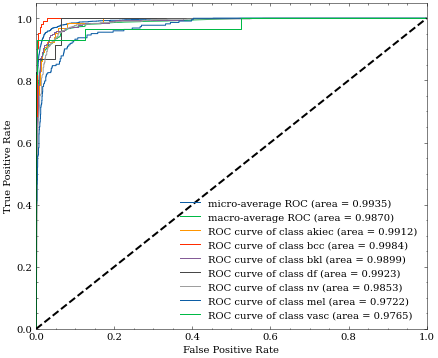

In [19]:
#-*-coding:utf-8-*-
 
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import roc_curve, auc
from scipy import interp
%matplotlib inline
y_label = a
 
y_score = b
 
n_classes = 7
 
# The ROC is calculated for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_label[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr["micro"], tpr["micro"], _ = roc_curve(y_label.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
 

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])
# Finally average it and compute AUC
mean_tpr /= n_classes
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
# Plot all ROC curves
lw=2
label=['akiec','bcc','bkl','df','nv','mel','vasc']
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
with plt.style.context(['science','no-latex']):
    plt.figure(figsize=(7,6))
    plt.plot(fpr["micro"], tpr["micro"],
             label='micro-average ROC (area = {0:0.4f})'
               ''.format(roc_auc["micro"]),)

    plt.plot(fpr["macro"], tpr["macro"],
             label='macro-average ROC (area = {0:0.4f})'
               ''.format(roc_auc["macro"]))

    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i],
                 label='ROC curve of class {0} (area = {1:0.4f})'
             ''.format(label[i], roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate',size=10)
    plt.ylabel('True Positive Rate',size=10)
    plt.legend(loc ='lower right')
    plt.savefig(r'./roc_DeepEnsembleLearning.svg',format='svg')
    plt.show()